In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Generate example time series data
np.random.seed(42)
time_series = np.cumsum(np.random.normal(size=100))

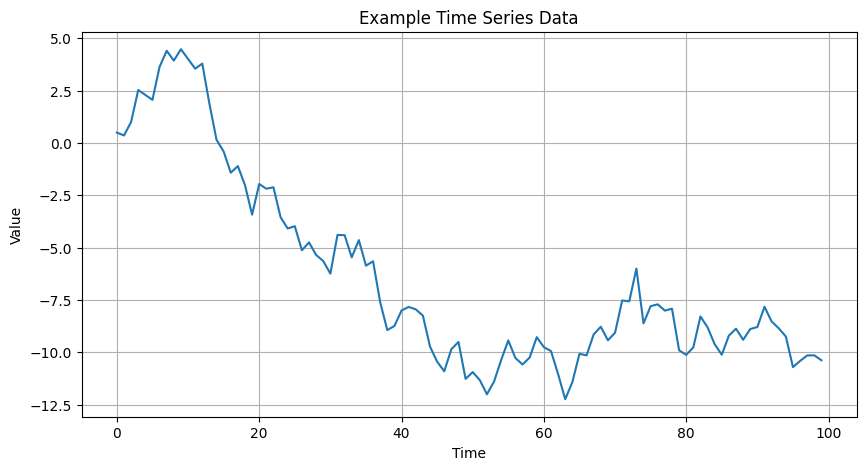

In [2]:
# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(time_series)
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

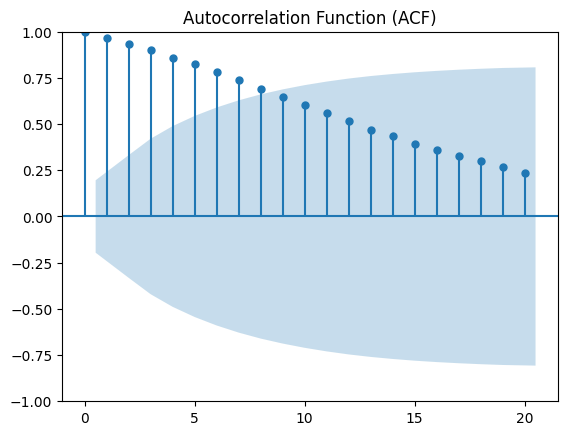

In [3]:
# Plot ACF and PACF to determine parameters for ARIMA model
plot_acf(time_series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

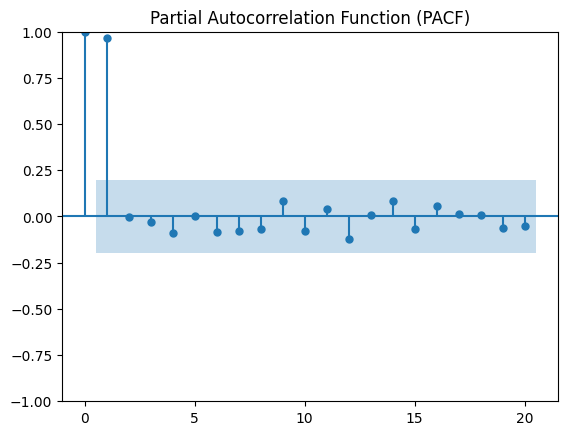

In [4]:
plot_pacf(time_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [5]:
# Split data into train and test sets
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

In [6]:
# Fit ARIMA model
order = (2, 1, 2) # Example order determined from ACF and PACF plots
model = ARIMA(train_data, order=order)
fitted_model = model.fit()

C:\Users\OMKAR\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\OMKAR\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


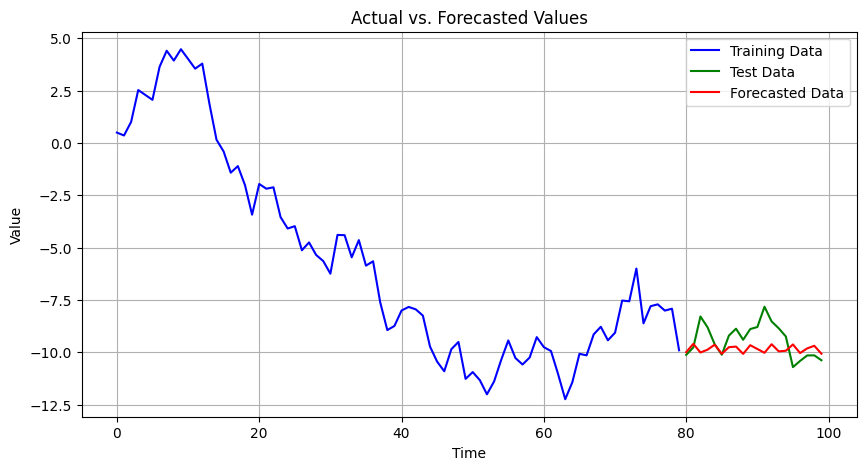

In [7]:
# Forecast
forecast = fitted_model.forecast(steps=len(test_data))

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_data)), train_data, label='Training Data', color='blue')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data', color='green')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), forecast, label='Forecasted Data', color='red')
plt.title('Actual vs. Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
